https://opendata.cbs.nl/#/CBS/nl/dataset/84527NED/table
https://denhaag.incijfers.nl/jive 

bevolking % ethniciteit


In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from scipy.optimize import curve_fit

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [401]:
prognosis = pd.read_csv("Regionale_prognose_2020_2050__bevolking__intervallen__regio_indeling_2018__18082022_233952.csv", on_bad_lines='skip', sep=";", decimal=",", skiprows=5, header=0)
nationalities = pd.read_excel("migratieachtergrond  - Den Haag.xlsx")

C:\Users\lis94\anaconda3\envs\thesis\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [387]:
nationalities["Time"] = range((2009-2021)*12, 12+1,12)

In [388]:
nationalities["% Hindoestaans"] = round(nationalities["% Surinaams"] * 0.44, 3)

In [389]:
nationalities

,Gebieden,Perioden,% Nederlands,% Turks,% Marokkaans,% Surinaams,Time,% Hindoestaans
0,Den Haag,2009,0.527,0.073,0.054,0.095,-144,0.042
1,Den Haag,2010,0.522,0.073,0.055,0.094,-132,0.041
2,Den Haag,2011,0.513,0.074,0.056,0.094,-120,0.041
3,Den Haag,2012,0.505,0.075,0.056,0.093,-108,0.041
4,Den Haag,2013,0.499,0.075,0.057,0.092,-96,0.040
5,Den Haag,2014,0.495,0.076,0.058,0.092,-84,0.040
6,Den Haag,2015,0.488,0.076,0.058,0.091,-72,0.040
7,Den Haag,2016,0.479,0.076,0.058,0.089,-60,0.039
8,Den Haag,2017,0.472,0.076,0.058,0.088,-48,0.039
9,Den Haag,2018,0.462,0.075,0.059,0.087,-36,0.038


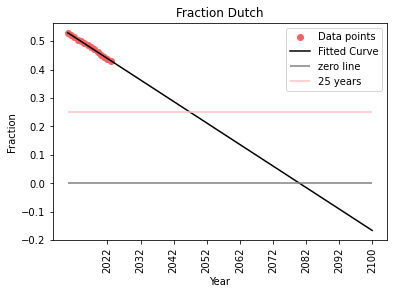

 
-0.0006304 x + 0.4388


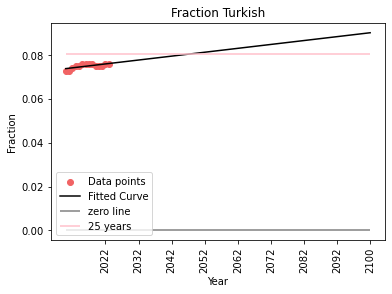

 
1.484e-05 x + 0.07605


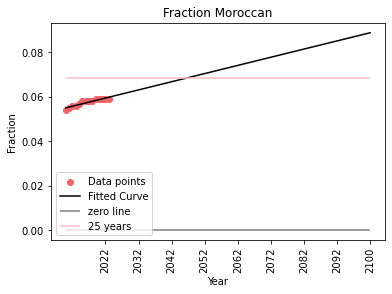

 
3.059e-05 x + 0.05952


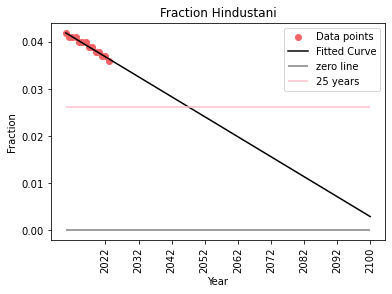

 
-3.535e-05 x + 0.03688


In [396]:
models = []
names = ["Fraction Dutch", "Fraction Turkish", "Fraction Moroccan", "Fraction Hindustani"]
i = 0
for nationality in ["% Nederlands", "% Turks", "% Marokkaans", "% Hindoestaans"]:
    x = nationalities["Time"]
    y=  nationalities[nationality]
    #polynomial fit with degree = 2
    model = np.poly1d(np.polyfit(x, y,  1))

    #add fitted polynomial line to scatterplot
    polyline = np.linspace(min(x), 12*80)
    plt.scatter(x, y, color= "#f16364", label="Data points")
    plt.plot(polyline, model(polyline), color="black", label="Fitted Curve")
    plt.hlines(y=0, xmin=min(x), xmax=12*80, color="grey", label="zero line")
    plt.hlines(y=model(25*12), xmin=min(x), xmax=12*80, color="pink", label="25 years")
    plt.title(names[i])
    plt.xlabel("Year")
    plt.xticks(list(range(0, 12*80, 12*10)) + [12*80+1] , list(range(2022, 2100, 10)) + [2100], rotation="vertical" )
    plt.ylabel("Fraction")
    plt.legend()
    plt.savefig("D:/juju/lumc/msc_thesis/report/images/growth_formula_" + names[i] +".png", format="png",  dpi=300, bbox_inches='tight')  
    plt.show()
    print(model)
    models.append(model)
    i += 1

In [237]:
-0.0004242 * 0 + 0.03688

0.03688

In [238]:
x = np.linspace(0, 25, 25)
models[3](x)

array([0.03688132, 0.0368445 , 0.03680768, 0.03677086, 0.03673404,
       0.03669721, 0.03666039, 0.03662357, 0.03658675, 0.03654993,
       0.03651311, 0.03647629, 0.03643947, 0.03640265, 0.03636583,
       0.03632901, 0.03629219, 0.03625536, 0.03621854, 0.03618172,
       0.0361449 , 0.03610808, 0.03607126, 0.03603444, 0.03599762])

In [239]:
models[2](x)

array([0.05951868, 0.05955054, 0.0595824 , 0.05961426, 0.05964612,
       0.05967798, 0.05970984, 0.0597417 , 0.05977357, 0.05980543,
       0.05983729, 0.05986915, 0.05990101, 0.05993287, 0.05996473,
       0.05999659, 0.06002845, 0.06006031, 0.06009217, 0.06012403,
       0.06015589, 0.06018775, 0.06021961, 0.06025147, 0.06028333])

In [240]:
((0.076 * 549166) - 2752)/(0.076 * 549166)

0.9340626944934874

In [241]:
l = 10
-4.808e-05 * l ** 2 - 0.0004321 * l + 0.09484


0.085711

In [402]:
prognosis = prognosis[:-1].copy()

In [403]:
prognosis["population size"] = prognosis["x 1 000"] * 1000
prognosis["change"] = prognosis["population size"]/prognosis["population size"].head(1).values[0]

In [412]:
prognosis

,Leeftijd,Perioden,x 1 000,population size,change,Time
0,Totaal,2020.0,548.1,548100.0,1.000000,-24
1,Totaal,2021.0,554.4,554400.0,1.011494,-12
2,Totaal,2022.0,559.5,559500.0,1.020799,0
3,Totaal,2023.0,564.9,564900.0,1.030651,12
4,Totaal,2024.0,570.3,570300.0,1.040504,24
5,Totaal,2025.0,575.3,575300.0,1.049626,36
6,Totaal,2026.0,580.3,580300.0,1.058748,48
7,Totaal,2027.0,585.0,585000.0,1.067323,60
8,Totaal,2028.0,588.3,588300.0,1.073344,72
9,Totaal,2029.0,591.6,591600.0,1.079365,84


In [405]:
#prognosis["Time"] = range(0, 2050-2020+1)
prognosis["Time"] = range(2*-12, 12*(2050-2022)+1, 12)

In [406]:
def func(x, a, b, c):
    return a* np.exp(-b*x) + c

In [407]:
x = prognosis["Time"]
y = prognosis["change"]
popt, pcov = curve_fit(func, x, y)

In [408]:
x_predictions = range(0, 12*80)
predictions = func(x_predictions, *popt)

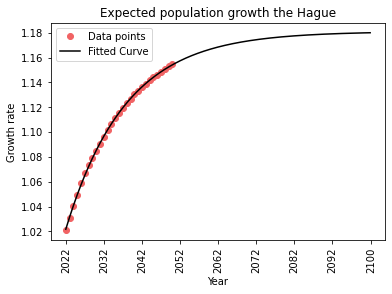

In [409]:
plt.figure()
plt.plot(x[2:], y[2:], 'o', label="Data points", color="#f16364")
plt.plot(x_predictions, func(x_predictions, *popt), 'k-', label="Fitted Curve")
#plt.plot(x_predictions, predictions, 'kP', label="Predictions")
plt.title("Expected population growth the Hague")
plt.xlabel("Year")
plt.xticks(list(range(0, 12*80, 12*10)) + [12*80+1] , list(range(2022, 2100, 10)) + [2100], rotation="vertical" )
plt.ylabel("Growth rate")
plt.legend()
plt.savefig("D:/juju/lumc/msc_thesis/report/images/population growth.png", format="png",  dpi=300, bbox_inches='tight')  
plt.show()

In [417]:
popt

array([-0.15917403,  0.0053049 ,  1.18092669])

In [419]:
(-0.15917403 * np.exp(-0.0053049*0) + 1.18092669)

1.02175266